In [27]:
from ANS import *

In [28]:
symbols= ['a','b','c','d']
dist= {"Uniform": [4, 4, 4, 4], # natural powers of two
        "Natural": [8,4,2,2],
        "Random": [6,2,8,4],
        "left": [16,16,6,4],
        "right": [4,4,16,20],
        "middle": [6, 24, 24, 6]
        }
symbol_len = [5,10,20,30, 50, 100, 150]

experiment_symbols = {}
for name, freq in dist.items():
    sym = []
    for slen in symbol_len:
        sym.append(get_symbols(symbols, freq, slen))
    experiment_symbols[name] = sym

In [29]:
# natural
freq_nat = dist["Natural"]
msg = experiment_symbols["Natural"]
u = rANS(symbols, freq_nat)
ent_nat = u.shannon_entropy()

compressed_data = []
for m in msg:
    enc_val, _ = u.encode(m, 0)
    compressed_data.append(len(enc_val))


In [30]:
freq_nat = dist["Uniform"]
msg = experiment_symbols["Uniform"]
u = rANS(symbols, freq_nat)
ent_uni = u.shannon_entropy()

compressed_data_uniform = []
for m in msg:
    enc_val, _ = u.encode(m, 0)
    compressed_data_uniform.append(len(enc_val))

In [31]:
freq_nat = dist["Random"]
msg = experiment_symbols["Random"]
u = rANS(symbols, freq_nat)
ent_ran = u.shannon_entropy()

compressed_data_random = []
for m in msg:
    enc_val, _ = u.encode(m, 0)
    compressed_data_random.append(len(enc_val))

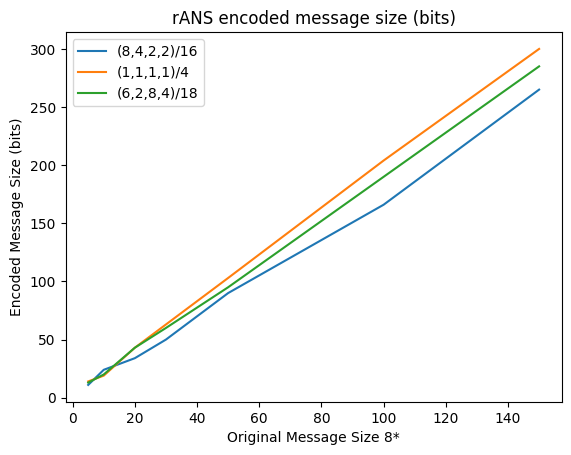

In [34]:
import matplotlib.pyplot as plt
plt.plot(symbol_len, compressed_data, label="(8,4,2,2)/16")
plt.plot(symbol_len, compressed_data_uniform, label = "(1,1,1,1)/4")
plt.plot(symbol_len, compressed_data_random, label="(6,2,8,4)/18")
plt.xlabel("Original Message Size 8*")
plt.ylabel("Encoded Message Size (bits)")
plt.title("rANS encoded message size (bits)")
plt.legend()

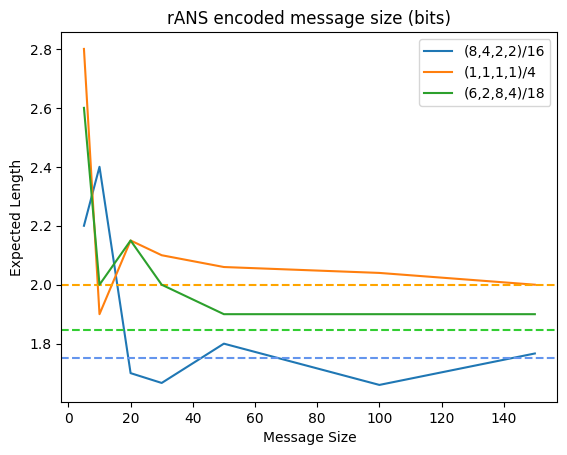

In [33]:
import matplotlib.pyplot as plt
plt.plot(symbol_len, np.divide(compressed_data,symbol_len), label="(8,4,2,2)/16")
plt.axhline(y=ent_nat, color='cornflowerblue', linestyle='--')

plt.plot(symbol_len, np.divide(compressed_data_uniform, symbol_len), label = "(1,1,1,1)/4")
plt.axhline(y=ent_uni, color='orange', linestyle='--')

plt.plot(symbol_len, np.divide(compressed_data_random,symbol_len), label="(6,2,8,4)/18")
plt.axhline(y=ent_ran, color='limegreen', linestyle='--')

plt.xlabel("Message Size ")
plt.ylabel("Expected Length")
plt.title("rANS Coompression Performance")
plt.legend()